In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
base_dir = "/storage/users/arihant"
base_dir_7t = [base_dir + "/HCP_7T/" + i   for i in os.listdir(base_dir + "/HCP_7T") if len(i) == 6]
base_dir_3t = [base_dir + "/HCP_3T/" + i   for i in os.listdir(base_dir + "/HCP_3T") if len(i) == 6]

In [3]:
base_dir_3t[0]

'/storage/users/arihant/HCP_3T/525541'

In [4]:
os.listdir(base_dir_3t[0] + "/T1w")

['T1w_acpc_dc_restore_1.25.nii.gz', 'Diffusion']

In [5]:
os.listdir(base_dir_7t[120] + "/T1w")

['T1w_acpc_dc_restore_1.05.nii.gz', 'Diffusion_7T']

In [6]:
path_7t = {}
path_3t = {}

In [7]:
for i in base_dir_7t:
    path_7t[i[-6:]] = {"3d_scan" : i + "/T1w/T1w_acpc_dc_restore_1.05.nii.gz" ,"data" : i + "/T1w/Diffusion_7T/data.nii.gz" 
                       , "bvals" : i + "/T1w/Diffusion_7T/bvals" , "bvecs" : i + "/T1w/Diffusion_7T/bvecs"
                      , "brain_mask" : i + "/T1w/Diffusion_7T/nodif_brain_mask.nii.gz"
                      , "grad_dev" : i + "/T1w/Diffusion_7T/grad_dev.nii.gz"}

In [8]:
for i in base_dir_3t:
    path_3t[i[-6:]] = {"3d_scan" : i + "/T1w/T1w_acpc_dc_restore_1.25.nii.gz" , "data" : i + "/T1w/Diffusion/data.nii.gz" 
                       , "bvals" : i + "/T1w/Diffusion/bvals" , "bvecs" : i + "/T1w/Diffusion/bvecs"
                       , "brain_mask" : i + "/T1w/Diffusion/nodif_brain_mask.nii.gz"
                      , "grad_dev" : i + "/T1w/Diffusion/grad_dev.nii.gz"}

In [9]:
p = list(path_7t.keys())
q = list(path_3t.keys())

In [10]:
path_3t[q[40]]

{'3d_scan': '/storage/users/arihant/HCP_3T/751550/T1w/T1w_acpc_dc_restore_1.25.nii.gz',
 'data': '/storage/users/arihant/HCP_3T/751550/T1w/Diffusion/data.nii.gz',
 'bvals': '/storage/users/arihant/HCP_3T/751550/T1w/Diffusion/bvals',
 'bvecs': '/storage/users/arihant/HCP_3T/751550/T1w/Diffusion/bvecs',
 'brain_mask': '/storage/users/arihant/HCP_3T/751550/T1w/Diffusion/nodif_brain_mask.nii.gz',
 'grad_dev': '/storage/users/arihant/HCP_3T/751550/T1w/Diffusion/grad_dev.nii.gz'}

In [11]:
path_7t[q[40]]

{'3d_scan': '/storage/users/arihant/HCP_7T/751550/T1w/T1w_acpc_dc_restore_1.05.nii.gz',
 'data': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/data.nii.gz',
 'bvals': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/bvals',
 'bvecs': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/bvecs',
 'brain_mask': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/nodif_brain_mask.nii.gz',
 'grad_dev': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/grad_dev.nii.gz'}

In [12]:
common = list(set(p) & set(q))
len(common)

171

In [13]:
len(p),len(q)

(176, 179)

In [14]:
common = list(set(p) & set(q))
check = []
for i in common:
    for j in path_7t[i]:
        if os.path.isfile(path_7t[i][j]) != True:
            check.append(path_7t[i][j])
    for j in path_3t[i]:
        if os.path.isfile(path_3t[i][j]) != True:
            check.append(path_3t[i][j])

In [15]:
check

[]

In [16]:
from dipy.io.image import load_nifti

In [17]:
import sklearn

In [18]:
data_7t, affine, img = load_nifti(path_7t[q[40]]["3d_scan"], return_img=True)
data_3t, affine, img = load_nifti(path_3t[q[40]]["3d_scan"], return_img=True)

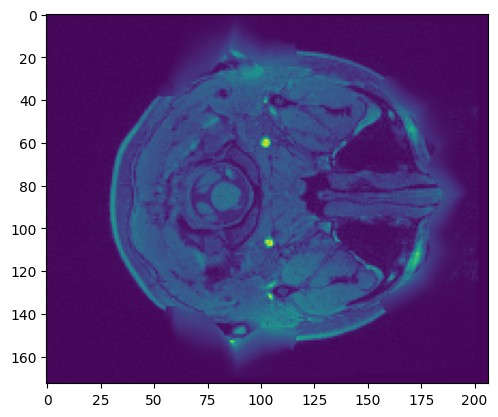

In [19]:
plt.imshow(data_7t[:,:,10])

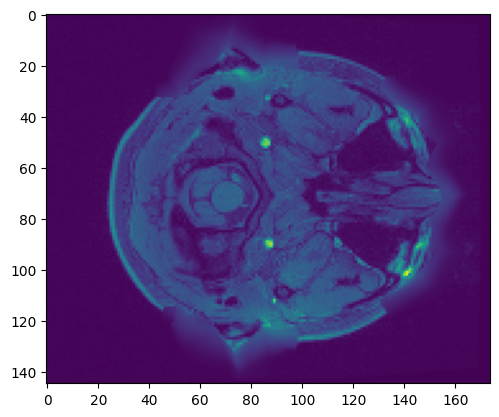

In [20]:
plt.imshow(data_3t[:,:,10])

In [21]:
path_7t[q[40]]

{'3d_scan': '/storage/users/arihant/HCP_7T/751550/T1w/T1w_acpc_dc_restore_1.05.nii.gz',
 'data': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/data.nii.gz',
 'bvals': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/bvals',
 'bvecs': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/bvecs',
 'brain_mask': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/nodif_brain_mask.nii.gz',
 'grad_dev': '/storage/users/arihant/HCP_7T/751550/T1w/Diffusion_7T/grad_dev.nii.gz'}

In [22]:
data_7t_mask, affine, img = load_nifti(path_7t[q[40]]["brain_mask"], return_img=True)
data_3t_mask, affine, img = load_nifti(path_3t[q[40]]["brain_mask"], return_img=True)

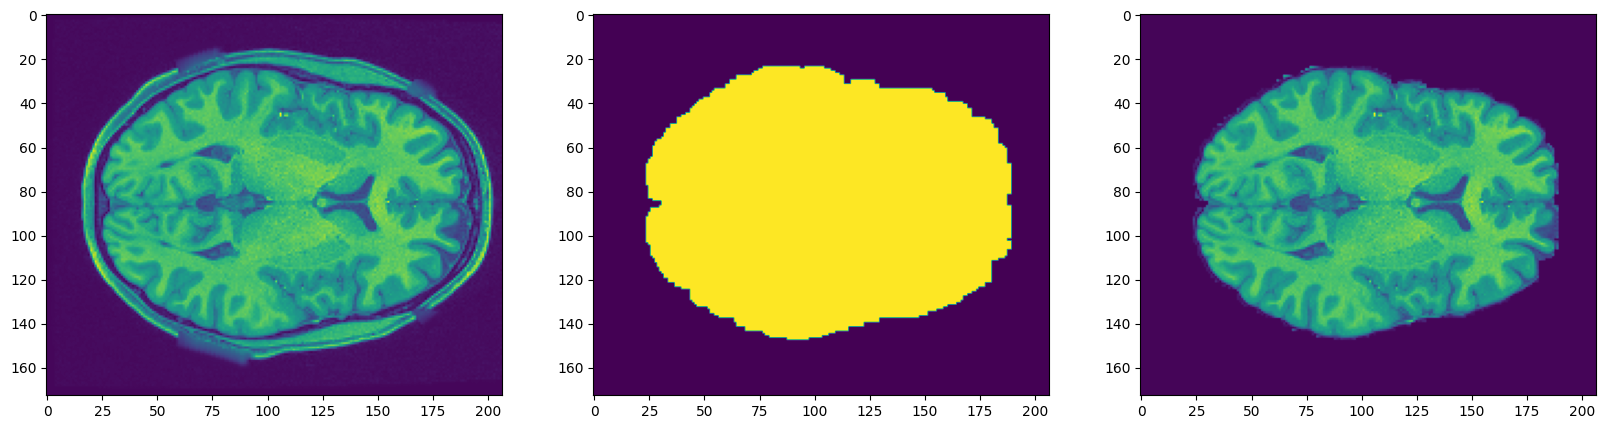

In [23]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_7t[:,:,i])
axis[1].imshow(data_7t_mask[:,:,i])
axis[2].imshow(data_7t_mask[:,:,i]*data_7t[:,:,i])

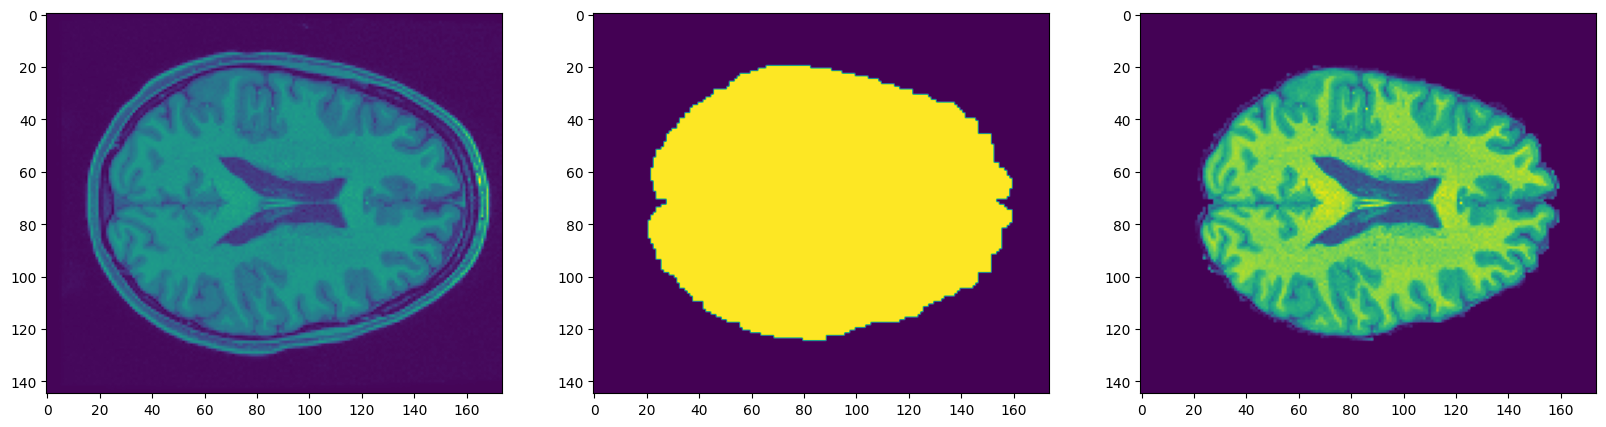

In [24]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_3t[:,:,i])
axis[1].imshow(data_3t_mask[:,:,i])
axis[2].imshow(data_3t_mask[:,:,i]*data_3t[:,:,i])

In [25]:
data_7t_data, affine, img = load_nifti(path_7t[q[40]]["data"], return_img=True)
data_3t_data, affine, img = load_nifti(path_3t[q[40]]["data"], return_img=True)

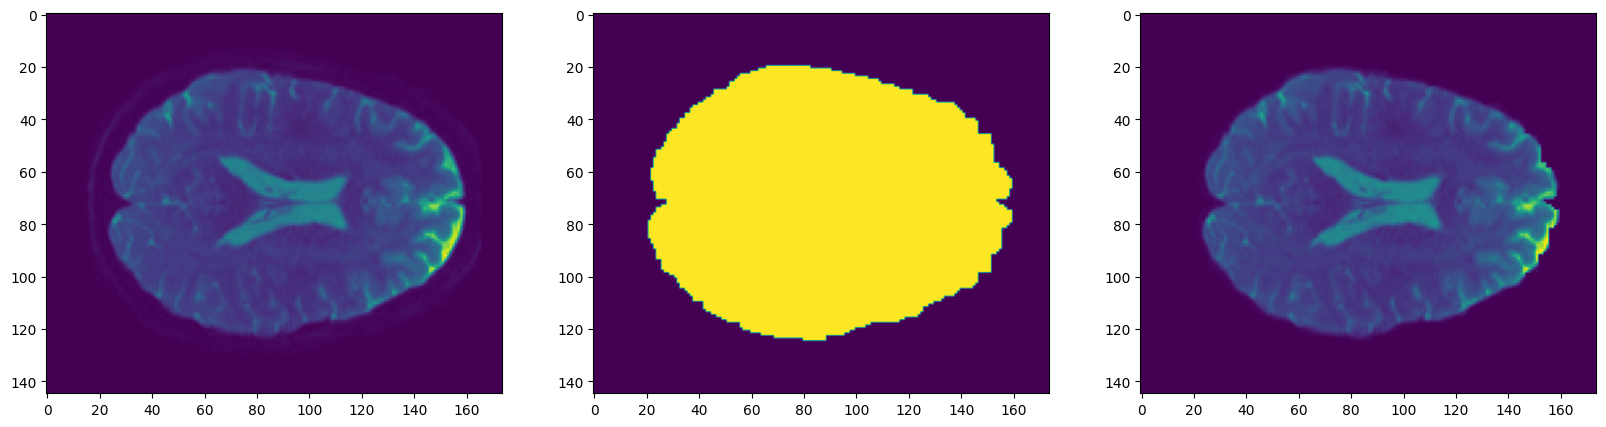

In [26]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_3t_data[:,:,i,0])
axis[1].imshow(data_3t_mask[:,:,i])
axis[2].imshow(data_3t_mask[:,:,i]*data_3t_data[:,:,i,0])

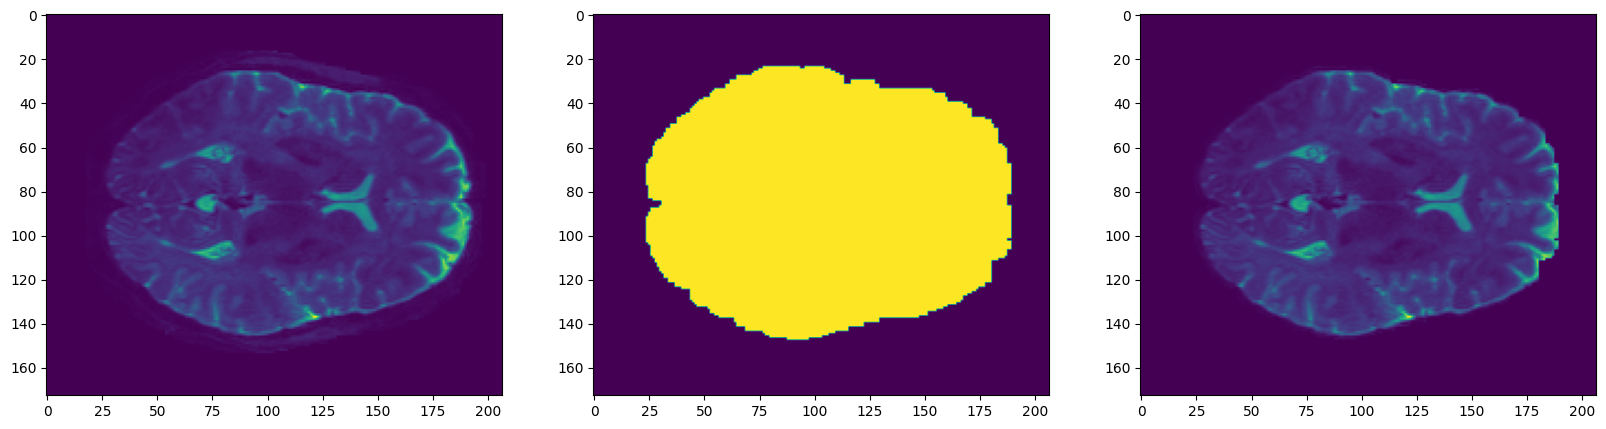

In [34]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_7t_data[:,:,i,0])
axis[1].imshow(data_7t_mask[:,:,i])
axis[2].imshow(data_7t_mask[:,:,i]*data_7t_data[:,:,i,0])

In [28]:
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
bvals_3t, bvecs_3t = read_bvals_bvecs(path_3t[q[40]]['bvals'], path_3t[q[40]]['bvecs'])
gtab_3t = gradient_table(bvals_3t, bvecs_3t)

In [29]:
from dipy.io import read_bvals_bvecs
bvals_7t, bvecs_7t = read_bvals_bvecs(path_7t[q[40]]['bvals'], path_7t[q[40]]['bvecs'])
gtab_7t = gradient_table(bvals_7t, bvecs_7t)

/home/arihant/miniconda3/lib/python3.10/site-packages/dipy/core/gradients.py:332: UserWarning: b0_threshold (value: 50) is too low, increase your b0_threshold. It should be higher than the lowest b0 value (55.0).
  warn("b0_threshold (value: {0}) is too low, increase your "


In [30]:
print(gtab_3t.bvecs.shape)

(288, 3)


In [31]:
gtab_3t.bvals,print(len(gtab_3t.bvals))

288


(array([   5., 1000., 1995., 3005.,  995., 2990., 2005.,  990., 1990.,
        3000., 1005., 1985., 2995., 1005., 1995., 2995.,    5.,  995.,
        2000., 3010., 3005.,  995., 2005., 1000., 1990., 2985., 1005.,
        2000., 3000.,  995., 1995., 2990.,    5., 3005., 1000., 2000.,
         990., 1990., 2990.,  995., 2985., 1995., 3005.,  995., 2010.,
        1000., 1990., 2995.,    5., 1005., 2005., 3000., 3000., 1005.,
        1985., 1005., 2985., 2005.,  995., 1990., 3005., 1000., 2990.,
        2000.,    5.,  990., 2005., 2995., 1000., 2005., 3000.,  995.,
        2005., 3005., 1005., 2000., 3010.,  990., 2005., 1995.,    5.,
        1000., 3010., 2990., 1005., 1990., 3005., 1000., 2010., 3000.,
         990., 2005., 2990., 2995., 1000.,    5., 2990.,  995., 1995.,
        1995., 1005., 2000., 2990., 1005., 2010., 2995., 1000., 1995.,
        3010., 1000., 2005., 2990.,    5.,  990., 2990., 2005., 1000.,
        2005., 2985.,  995., 2005., 2990.,  995., 2005., 2990., 1005.,
      

In [32]:
print(gtab_7t.bvecs.shape)

(143, 3)


In [33]:
gtab_7t.bvals,print(len(gtab_7t.bvals))

143


(array([  65.,  980., 1985.,  990., 2025., 1010., 1985., 1000., 2025.,
         975.,   60., 2000.,  990., 1985., 1010., 1980., 1015., 2025.,
         990., 2010.,   55., 1000., 2010.,  995., 2010.,  980., 1970.,
        1020., 1995., 1000.,   65., 2020.,  985., 2015., 1020., 2010.,
         985., 1965.,  990., 2000.,   60., 1010., 1995., 1015., 1980.,
         990., 2015., 1000., 2010.,  980.,   55., 2025., 1000., 1995.,
        1020., 1995.,  990., 1980.,  985., 2015.,   60.,  995., 2015.,
        1015., 1970., 1000., 1990., 1020., 2020., 1000.,   65., 2010.,
        1010., 2020., 1000., 2025.,  980., 1995.,  985., 2000.,   65.,
        1005., 2010.,  985., 1975., 1010., 1975.,  985., 1995.,  990.,
          60., 1990.,  975., 1965., 1005., 2000.,  990., 2020., 1010.,
        1985.,   60., 1015., 2015.,  995., 1975., 1005., 2005.,  985.,
        1995.,  980.,   60., 1975.,  985., 2025., 1000., 1985., 1010.,
        1990.,  980., 1990.,   65., 1005., 1970., 1010., 2010., 1020.,
      

In [35]:
gtab_3t.info

B-values shape (288,)
         min 5.000000
         max 3010.000000
B-vectors shape (288, 3)
          min -0.991947
          max 0.999932



In [36]:
gtab_7t.info

B-values shape (143,)
         min 55.000000
         max 2025.000000
B-vectors shape (143, 3)
          min -0.999454
          max 0.996375



### Loaded Path and can see basic data

In [65]:
path = {'3T' : path_3t, '7T': path_7t}

In [63]:
import numpy as np
len(np.where(gtab_3t.bvals == min(gtab_3t.bvals ))[0])

18

In [64]:
data_3t_data_mean = np.mean(data_3t_data , axis = 3 ,where = gtab_3t.bvals == min(gtab_3t.bvals ))

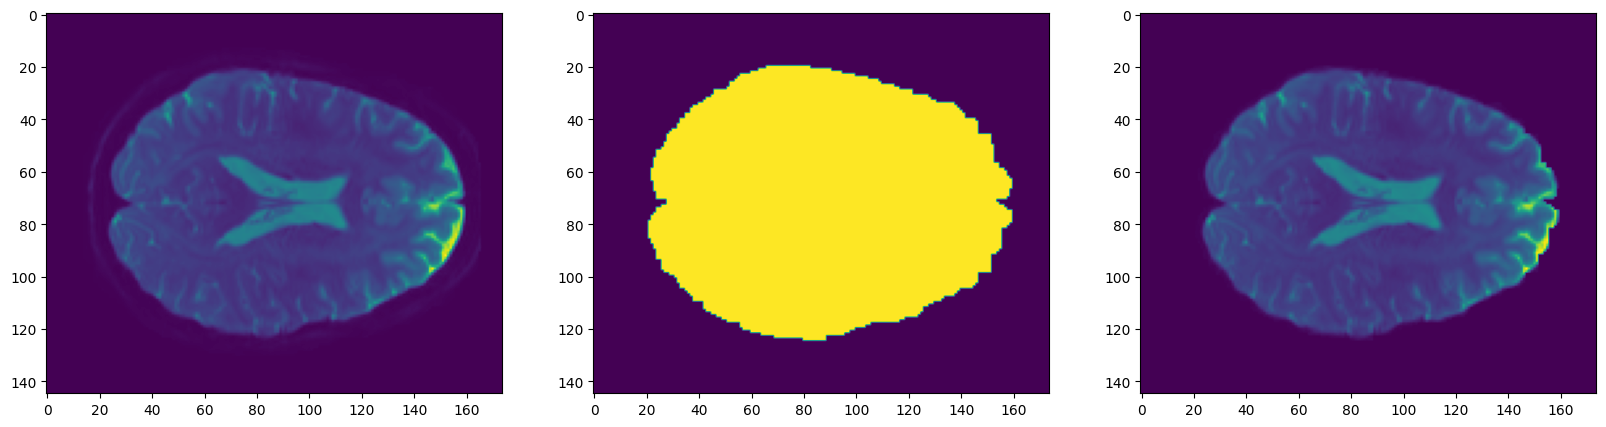

In [61]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_3t_data_mean[:,:,i])
axis[1].imshow(data_3t_mask[:,:,i])
axis[2].imshow(data_3t_mask[:,:,i]*data_3t_data_mean[:,:,i])

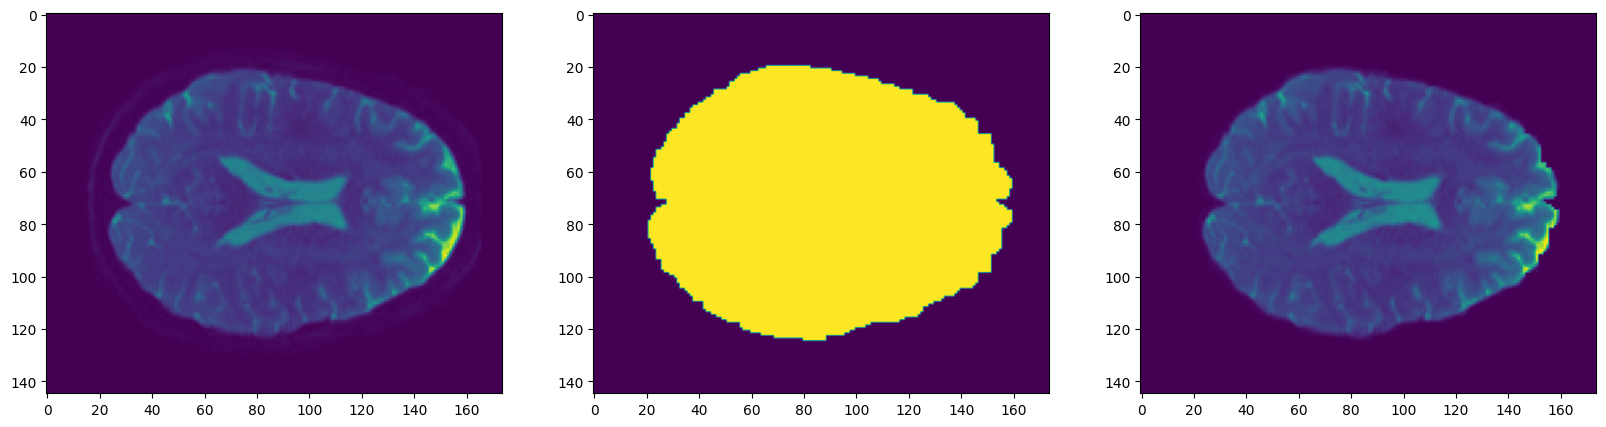

In [55]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_3t_data[:,:,i,0])
axis[1].imshow(data_3t_mask[:,:,i])
axis[2].imshow(data_3t_mask[:,:,i]*data_3t_data[:,:,i,0])

In [74]:
np.where(gtab_3t.bvals == 5)

(array([  0,  16,  32,  48,  64,  80,  95, 112, 128, 144, 160, 176, 191,
        208, 224, 240, 256, 272]),)

In [78]:
if 10 in gtab_3t.bvals:
    print("yes")

In [80]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
# py.iplot(table, filename='jupyter-table1')

In [81]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()